# SNA Final Report

## Team : EigenVector


## Team Members :
### Apurv Jain             16UCC019
### Aakirti Agarwal      16UCS002
### Parul Shandilya     16UCS126
### Priyansi Singh       16UCS143

###### Guided by: Dr. Sakthi Balan, Associate Professor in Computer Science & Engineering Department at The LNM Institute of Information Technology



# Data Set 1 - Wikipedia Talk network
## Dataset Description :
The network contains all the users and discussion from the inception of Wikipedia till January 2008. 
#####  Nodes in the network represent Wikipedia users and a directed edge from node i to node j represents that user i at least once edited a talk page of user j.


### Finding Random Sample

In the original network, there are 2394385 nodes and  5021410 edges. Since it is a very huge network , we used a random sample in order to get the inferences.

In [7]:
#finding random sample
import os
import random

filename = 'wiki-Talk1.txt'

result = []
f = open("wiki-Talk.txt", "a")

with open(filename) as fh:
    data = fh.readlines()
    for line in data:
        if line:
            words = line.split()
            result.append(words)

sample = random.sample(result, 1000)

for item in sample:
    f.write(item[0] + "   " + item[1] + "\n")

Now using the above random sample , we will read the graph G from the list of edges ('wiki-Talk.txt') and find the general information about the graph.

In [1]:
import networkx as nx

#reading graph from list of edges
G=nx.read_edgelist('wiki-Talk.txt',nodetype=int,create_using=nx.DiGraph())

print(" ")

#general information about the graph
print (nx.info(G))

 
Name: 
Type: DiGraph
Number of nodes: 1745
Number of edges: 1004
Average in degree:   0.5754
Average out degree:   0.5754


#### Basic Information about graph:
From here , we can see that the graph generated has 1745 nodes and 1004 edges. It is a directed graph and average in degree & out degree are 0.5771 (fraction) .

### Graph Representation


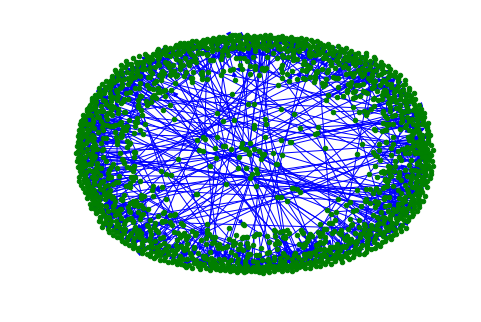

In [4]:
import matplotlib.pyplot as plt

# drawing graph
nx.draw(G, pos=None, node_color='g', edge_color='b',node_size=20)
plt.show()
#print (nx.is_connected(G))

In the graph , nodes are represented by green colour and directed edges are represented by blue colour.

### Degree Distribution

We will now try to find how 

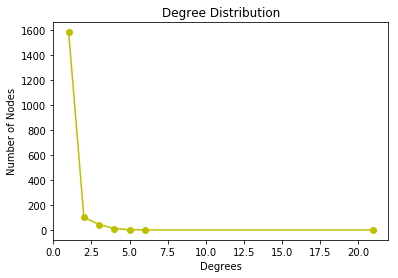

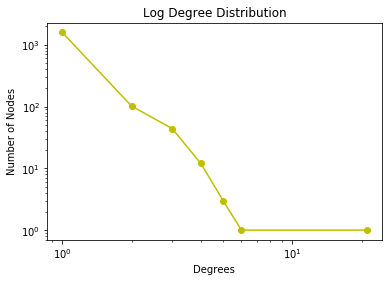

In [5]:


d=dict()
for x,y in nx.degree(G):
    if y not in d:
        d[y]=1
    else:
        d[y]+=1
#for x in d:
    #print(x,d[x])
plt.plot(d.keys(),d.values(),'yo-')
plt.xlabel("Degrees")
plt.ylabel("Number of Nodes")
plt.title("Degree Distribution")
#print(list(set(all_degrees)))
#print (nx.degree(G))
plt.show()
plt.loglog(d.keys(),d.values(),'yo-')
plt.xlabel("Degrees")
plt.ylabel("Number of Nodes")
plt.title("Log Degree Distribution")
plt.show()


#### Power Law
According to the Power Law ,very less nodes have high degree and as the number of nodes increases , the degree keeps on decreasing.
So, when we draw the log-log graph of this data , we will get a straight line.

We can observe the same here in this network.
So, we can conclude that a large number of users edited very less talk pages and the number of users decreased as the number of edited pages increased.

### Density Calculation
A graph is  more dense if the number of edges is close to the number of maximal edges possible.
Density is calculated as the ratio of edges in network to maximal edges possible.

In [6]:
#calculating density
print (nx.density(G))

0.000329907205384


The density is 0.0033 . Thus , it is a sparse graph

### Local Clustering Coeffecient

It measures the immediate neighbour connectivity of a node.

In [7]:
#getting average local clustering coeffecient
print "Average Local Clustering Coeffecient is:"
print nx.average_clustering(G)

#printing local clustering coeffecient of some sample nodes
w=1

print("Node    Local Clustering Coeffecient")
for p,r in nx.clustering(G).items():
        if(w<=5):
            print(str(p)+"\t"+str(r))
            w=w+1


Average Local Clustering Coeffecient is:
0.0
Node    Local Clustering Coeffecient
1	0
2	0
3	0
4	0
5	0


In the dictionary , first element gives node number and 2nd element gives Local clustering coefficient
We get local clustering for all nodes as 0. This means that if user A is connected to a group of users, then no 2 users in that group are connected to each other. 

### Global Clustering Coeffecient
It measures the fraction of all possible triangles present in G.

In [8]:
#printing global clustering coeffecient of nodes
print "The Golbal Clustering Coeffecient is:"
print(nx.transitivity(G))

The Golbal Clustering Coeffecient is:
0


The Global Transitivity is 0 (Graph is intransitive). It means that no triangle is present in Graph G.That means , if user A edited talk page of user B , and user B edited talk page of user C , then user A did not edit talk page of user C.

### Reciprocity

The reciprocity of a directed graph is defined as the ratio of the number of edges pointing in both directions to the total number of edges in the graph.

In [9]:
print "The reciprocity is :"
print nx.reciprocity(G)

The reciprocity is :
0.00199203187251


The reciprocity is 0.00199. This means that if user A edits the talk page of B , then it is very rare that B also edits the talk page of A. 

## Centrality Measures
Centrality measures indicate how important a node is in a graph. Following are the different Centrality Measures:

### 1. Degree Cenrality
There are two degrees involoved in directed graph - in_ degree and out_degree

#### In Degree
It computes the in-degree of all nodes in graph 

In [10]:
#calculating in-degree
dict1=G.in_degree()
print "The nodes with maximum in-degree are :"
i= max(nx.in_degree_centrality(G),key=(nx.in_degree_centrality(G)).get)
val=dict1[i]

print("Node    inDegree")
for p,r in dict1:
    if (r==val):
        print (str(p)+"\t"+str(r))

print (" ")
print "List of some nodes with their in-degree:"
w=1
for p,r in dict1:
    if(w<=5):
        print(str(p)+"\t"+str(r))
        w=w+1


The nodes with maximum in-degree are :
Node    inDegree
754	2
907	2
923	2
18935	2
2889	2
2893	2
2920	2
601149	2
4447	2
 
List of some nodes with their in-degree:
1	1
2	1
3	1
4	1
5	0


We observe that the highest in-degree is "2" which is associated with all the listed nodes. This means that all these listed users' talk pages are edited the maximum number of times. Also , we can conclude that the talk pages of these users are much popular.

#### Out Degree
It computes the out-degree of all nodes in graph 

In [11]:
#calculating out-degree
dict1=G.out_degree()
print "The nodes with maximum out-degree are :"
i= max(nx.out_degree_centrality(G),key=(nx.out_degree_centrality(G)).get)

val=dict1[i]
print("Node    outDegree")
for p,r in dict1:
    if (r==val):
        print (str(p)+"\t"+str(r))
        
print (" ")
print "List of some nodes with their out-degree:"
w=1
for p,r in dict1:
    if(w<=5):
        print(str(p)+"\t"+str(r))
        w=w+1



The nodes with maximum out-degree are :
Node    outDegree
3215	21
 
List of some nodes with their out-degree:
1	1
2	2
3	2
4	0
5	1


The maximum out-degree is "21" which is associated with node 3125.This means that this user has contributed a lot in wikipedia.He has edited talk pages of most of the users.

### Eigen Vector Centrality :

Eigenvector centrality computes the centrality for a node based on the centrality of its neighbors. The eigenvector centrality for node i is
                    Ax=λx
 where A is the adjacency matrix of the graph G with eigenvalue λ

In [12]:
#calculating eigen vector centrality
import numpy as np
dict=nx.eigenvector_centrality_numpy(G)
i=max(nx.eigenvector_centrality_numpy(G),key=(nx.eigenvector_centrality_numpy(G).get))

print "Some of the nodes with their Eigen Vector Centrality are:"
#print i,dict[i]
print("Node    Eigen Vector Centrality")

# sorting based on values
dict_sorted_keys = sorted(dict, key=dict.get, reverse=True)
w=1
for r in dict_sorted_keys:
    if(w<=5):
        w=w+1
        print (str(r)+"\t"+str(dict[r]))

Some of the nodes with their Eigen Vector Centrality are:
Node    Eigen Vector Centrality
1163519	0.4472135954999581
2	0.447213595499958
4	0.447213595499958
1	0.44721359549995787
3	0.44721359549995787


Node 3 has the maximum eigen vector centrality measure (have sorted the list and displayed top 5 entries). This means that several influential users have edited this user's talk page.

### Betweenness Centrality:

Betweenness centrality of a node v is the sum of the fraction of all-pairs shortest paths that pass through v.

Since path is irrelevant in context of this data , this centrality measure is not apt for our analysis.


### Closeness Centrality

Closeness centrality of a node u is the reciprocal of the average shortest path distance to u over all n-1 reachable nodes.

Since path is irrelevant in context of this data , this centrality measure is not apt for our analysis.

### Conclusion

1. In the original network, there are 2394385 nodes and  5021410 edges. Since it is a very huge network , we used a random sample in order to get the inferences.
2. Nodes in the network represent Wikipedia users and a directed edge from node i to node j represents that user i at least once edited a talk page of user j.
3. It is a directed,unweighted graph with 1745 nodes and 1004 edges.
4. This network roughly follows Power Law Distribution (Degree Distribution). It is a sparse graph. 
5. It can be observed that if user A edits the talk page of B , then it is very rare that B also edits the talk page of A.
6. The graph is observed to be intransitive.
7. The user with the maximum out-degree has edited most of the talk pages.
8. The user with the maximum in-degree has the most popular talk pages.
9. The user with maximum eigen vector centrality measures has his talk pages edited by most influential users. 

